In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import numpy as np
import keras
from keras.callbacks import EarlyStopping
from scipy import io
import os
import tensorflow as tf
from sklearn import linear_model
from sklearn import datasets
from sklearn import metrics
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, PReLU, LeakyReLU, Activation, ReLU, LSTM, Softmax
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import plot_model
from keras.layers import K
from sklearn.preprocessing import scale
from sklearn import model_selection

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
training_data = io.loadmat('Neural_in_all.mat')['Neural_in_matrix']
training_label = io.loadmat('DS_all')['DS_matrix']

In [9]:
def spliter(vec, cluster):
    res = []
    l = len(vec)/2
    r = int(len(vec)/cluster)
    for i in range(int(r/2)):
        ans = []
        
        for j in range(cluster):
            ans += [vec[j+i]]
            
        for j in range(cluster):
            ans += [vec[j+i+int(l)]]        
        res += [ans]
        
        
    return np.array(res)

In [12]:
def agg_maker(matrix, cluster):
    aggre = spliter(matrix[0], cluster)
    for i in range(1, matrix.shape[0]):
        aggre = np.concatenate([aggre, spliter(matrix[i], cluster)])
        
    return aggre

In [13]:
aggre_train = agg_maker(training_data, 3)

In [15]:
aggre_label = training_label.flatten()

In [84]:
from sklearn import preprocessing
rg = 4000
scaler = preprocessing.MinMaxScaler()
scaler = scaler.fit(aggre_train[0:rg])
scaled_aggre_train = scaler.transform(aggre_train[0:rg])

In [26]:
scaled_aggre_train.shape

(100, 6)

In [85]:
Raw = Input(shape = (aggre_train.shape[1], ))
Dense_K1 = Dense(units = 16, activation = 'relu')(Raw)
Dense_K2 = Dense(units = 64, activation = 'relu')(Dense_K1)
Dense_K3 = Dense(units = 32, activation = 'relu')(Dense_K2)
# Out = Dense(units = training_label.shape[1], activation = 'sigmoid')(PR_K3)
Out = Dense(units = 1, activation = 'relu')(Dense_K3)


adam = optimizers.Adam(lr = 0.001)
model_new = Model(inputs = Raw, outputs = Out)
model_new.compile(loss = 'mse', optimizer = 'rmsprop')
# early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2)
model_new.fit(scaled_aggre_train, aggre_label[0:rg], 
              epochs = 1000, batch_size = 4)

Epoch 1/1000
4000/4000 [==============================] - 2s 473us/step - loss: 3.2434
Epoch 2/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.8739
Epoch 3/1000
4000/4000 [==============================] - 1s 276us/step - loss: 2.8436
Epoch 4/1000
4000/4000 [==============================] - 1s 278us/step - loss: 2.8243
Epoch 5/1000
4000/4000 [==============================] - 1s 276us/step - loss: 2.8009
Epoch 6/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.8017
Epoch 7/1000
4000/4000 [==============================] - 1s 278us/step - loss: 2.7681
Epoch 8/1000
4000/4000 [==============================] - 1s 278us/step - loss: 2.7701
Epoch 9/1000
4000/4000 [==============================] - 1s 280us/step - loss: 2.7506
Epoch 10/1000
4000/4000 [==============================] - 1s 278us/step - loss: 2.7295
Epoch 11/1000
4000/4000 [==============================] - 1s 277us/step - loss: 2.7219
Epoch 12/1000
4000/4000 [================

4000/4000 [==============================] - 1s 297us/step - loss: 2.6053
Epoch 95/1000
4000/4000 [==============================] - 1s 295us/step - loss: 2.5984
Epoch 96/1000
4000/4000 [==============================] - 1s 317us/step - loss: 2.6048
Epoch 97/1000
4000/4000 [==============================] - 1s 316us/step - loss: 2.6150
Epoch 98/1000
4000/4000 [==============================] - 1s 305us/step - loss: 2.5675
Epoch 99/1000
4000/4000 [==============================] - 1s 292us/step - loss: 2.6056
Epoch 100/1000
4000/4000 [==============================] - 1s 291us/step - loss: 2.5860
Epoch 101/1000
4000/4000 [==============================] - 1s 294us/step - loss: 2.6006
Epoch 102/1000
4000/4000 [==============================] - 1s 297us/step - loss: 2.5694
Epoch 103/1000
4000/4000 [==============================] - 1s 303us/step - loss: 2.5698
Epoch 104/1000
4000/4000 [==============================] - 1s 295us/step - loss: 2.5697
Epoch 105/1000
4000/4000 [===============

4000/4000 [==============================] - 1s 303us/step - loss: 2.5267
Epoch 187/1000
4000/4000 [==============================] - 1s 304us/step - loss: 2.5196
Epoch 188/1000
4000/4000 [==============================] - 1s 301us/step - loss: 2.5091
Epoch 189/1000
4000/4000 [==============================] - 1s 314us/step - loss: 2.5078
Epoch 190/1000
4000/4000 [==============================] - 1s 299us/step - loss: 2.5765
Epoch 191/1000
4000/4000 [==============================] - 1s 315us/step - loss: 2.5387
Epoch 192/1000
4000/4000 [==============================] - 1s 310us/step - loss: 2.5143
Epoch 193/1000
4000/4000 [==============================] - 1s 299us/step - loss: 2.5326
Epoch 194/1000
4000/4000 [==============================] - 1s 304us/step - loss: 2.5257
Epoch 195/1000
4000/4000 [==============================] - 1s 297us/step - loss: 2.4929
Epoch 196/1000
4000/4000 [==============================] - 1s 293us/step - loss: 2.5624
Epoch 197/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 287us/step - loss: 2.5658
Epoch 279/1000
4000/4000 [==============================] - 1s 283us/step - loss: 2.5537
Epoch 280/1000
4000/4000 [==============================] - 1s 284us/step - loss: 2.5485
Epoch 281/1000
4000/4000 [==============================] - 1s 288us/step - loss: 2.5459
Epoch 282/1000
4000/4000 [==============================] - 1s 281us/step - loss: 2.5690
Epoch 283/1000
4000/4000 [==============================] - 1s 287us/step - loss: 2.5499
Epoch 284/1000
4000/4000 [==============================] - 1s 282us/step - loss: 2.5168
Epoch 285/1000
4000/4000 [==============================] - 1s 284us/step - loss: 2.5424
Epoch 286/1000
4000/4000 [==============================] - 1s 287us/step - loss: 2.5424
Epoch 287/1000
4000/4000 [==============================] - 1s 283us/step - loss: 2.5361
Epoch 288/1000
4000/4000 [==============================] - 1s 283us/step - loss: 2.5531
Epoch 289/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 320us/step - loss: 2.5438
Epoch 371/1000
4000/4000 [==============================] - 1s 325us/step - loss: 2.5511
Epoch 372/1000
4000/4000 [==============================] - 1s 320us/step - loss: 2.5347
Epoch 373/1000
4000/4000 [==============================] - 1s 320us/step - loss: 2.5674
Epoch 374/1000
4000/4000 [==============================] - 1s 322us/step - loss: 2.6081
Epoch 375/1000
4000/4000 [==============================] - 1s 320us/step - loss: 2.5857
Epoch 376/1000
4000/4000 [==============================] - 1s 317us/step - loss: 2.5914
Epoch 377/1000
4000/4000 [==============================] - 1s 288us/step - loss: 2.5595
Epoch 378/1000
4000/4000 [==============================] - 1s 278us/step - loss: 2.5678
Epoch 379/1000
4000/4000 [==============================] - 1s 274us/step - loss: 2.5811
Epoch 380/1000
4000/4000 [==============================] - 1s 274us/step - loss: 2.5799
Epoch 381/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 273us/step - loss: 2.6288
Epoch 463/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.6434
Epoch 464/1000
4000/4000 [==============================] - 1s 317us/step - loss: 2.6052
Epoch 465/1000
4000/4000 [==============================] - 1s 331us/step - loss: 2.6269
Epoch 466/1000
4000/4000 [==============================] - 1s 331us/step - loss: 2.6533
Epoch 467/1000
4000/4000 [==============================] - 1s 328us/step - loss: 2.6497
Epoch 468/1000
4000/4000 [==============================] - 1s 327us/step - loss: 2.6599
Epoch 469/1000
4000/4000 [==============================] - 1s 324us/step - loss: 2.6128
Epoch 470/1000
4000/4000 [==============================] - 1s 324us/step - loss: 2.6454
Epoch 471/1000
4000/4000 [==============================] - 1s 325us/step - loss: 2.6307
Epoch 472/1000
4000/4000 [==============================] - 1s 322us/step - loss: 2.6235
Epoch 473/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 275us/step - loss: 2.5537
Epoch 555/1000
4000/4000 [==============================] - 1s 279us/step - loss: 2.5730
Epoch 556/1000
4000/4000 [==============================] - 1s 281us/step - loss: 2.5511
Epoch 557/1000
4000/4000 [==============================] - 1s 277us/step - loss: 2.5883
Epoch 558/1000
4000/4000 [==============================] - 1s 277us/step - loss: 2.5545
Epoch 559/1000
4000/4000 [==============================] - 1s 276us/step - loss: 2.5832
Epoch 560/1000
4000/4000 [==============================] - 1s 277us/step - loss: 2.5354
Epoch 561/1000
4000/4000 [==============================] - 1s 276us/step - loss: 2.5495
Epoch 562/1000
4000/4000 [==============================] - 1s 317us/step - loss: 2.5596
Epoch 563/1000
4000/4000 [==============================] - 1s 317us/step - loss: 2.5539
Epoch 564/1000
4000/4000 [==============================] - 1s 277us/step - loss: 2.5440
Epoch 565/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 275us/step - loss: 2.7236
Epoch 647/1000
4000/4000 [==============================] - 1s 274us/step - loss: 2.7529
Epoch 648/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.7386
Epoch 649/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.7770
Epoch 650/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.7467
Epoch 651/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.7063
Epoch 652/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.7859
Epoch 653/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.7970
Epoch 654/1000
4000/4000 [==============================] - 1s 274us/step - loss: 2.7245
Epoch 655/1000
4000/4000 [==============================] - 1s 286us/step - loss: 2.7631
Epoch 656/1000
4000/4000 [==============================] - 1s 274us/step - loss: 2.7293
Epoch 657/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 276us/step - loss: 2.6299
Epoch 739/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.6071
Epoch 740/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.5884
Epoch 741/1000
4000/4000 [==============================] - 1s 302us/step - loss: 2.6215
Epoch 742/1000
4000/4000 [==============================] - 1s 334us/step - loss: 2.6282
Epoch 743/1000
4000/4000 [==============================] - 1s 328us/step - loss: 2.6090
Epoch 744/1000
4000/4000 [==============================] - 1s 312us/step - loss: 2.6158
Epoch 745/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.6204
Epoch 746/1000
4000/4000 [==============================] - 1s 274us/step - loss: 2.5950
Epoch 747/1000
4000/4000 [==============================] - 1s 275us/step - loss: 2.5761
Epoch 748/1000
4000/4000 [==============================] - 1s 277us/step - loss: 2.5868
Epoch 749/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 320us/step - loss: 2.5036
Epoch 831/1000
4000/4000 [==============================] - 1s 310us/step - loss: 2.4708
Epoch 832/1000
4000/4000 [==============================] - 1s 272us/step - loss: 2.4749
Epoch 833/1000
4000/4000 [==============================] - 1s 272us/step - loss: 2.4968
Epoch 834/1000
4000/4000 [==============================] - 1s 271us/step - loss: 2.4946
Epoch 835/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.4910
Epoch 836/1000
4000/4000 [==============================] - 1s 276us/step - loss: 2.4850
Epoch 837/1000
4000/4000 [==============================] - 1s 280us/step - loss: 2.5097
Epoch 838/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.5047
Epoch 839/1000
4000/4000 [==============================] - 1s 272us/step - loss: 2.4773
Epoch 840/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.5266
Epoch 841/1000
4000/4000 [==========

4000/4000 [==============================] - 1s 271us/step - loss: 2.5176
Epoch 923/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.5270
Epoch 924/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.5827
Epoch 925/1000
4000/4000 [==============================] - 1s 280us/step - loss: 2.5394
Epoch 926/1000
4000/4000 [==============================] - 1s 271us/step - loss: 2.5481
Epoch 927/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.5460
Epoch 928/1000
4000/4000 [==============================] - 1s 273us/step - loss: 2.4953
Epoch 929/1000
4000/4000 [==============================] - 1s 271us/step - loss: 2.5450
Epoch 930/1000
4000/4000 [==============================] - 1s 271us/step - loss: 2.5924
Epoch 931/1000
4000/4000 [==============================] - 1s 272us/step - loss: 2.6903
Epoch 932/1000
4000/4000 [==============================] - 1s 272us/step - loss: 2.5593
Epoch 933/1000
4000/4000 [==========

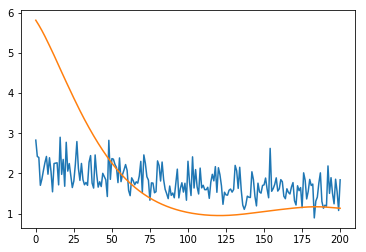

In [86]:
plt.plot(model_new.predict(scaled_aggre_train[0:201]))
plt.plot(aggre_label[0:201])

In [82]:
29/48

0.6041666666666666